# <h2 align=center> **EDA ML-OPS** </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

# Suprimir todos los warnings
warnings.filterwarnings("ignore")

#Cargar los Dataframe desde los archivos parquet
df_reviews = pd.read_parquet('./0 Dataset/user_review_LISTO.parquet')
df_games =   pd.read_parquet('./0 Dataset/steam_games_LISTO.parquet')
df_items =   pd.read_parquet('./0 Dataset/user_items_LISTO.parquet')

# 1_ **`output_steam_games`**



**Las columnas de este dataset son:**   
   * 1_ 🏢 **Publisher**: La empresa publicadora del contenido.
   * 2_ 🎮 **Genres** El género del juego, que puede estar compuesto por una o varias etiquetas.
   * 3_ 🎲 **App Name**: El nombre del juego.
   * 4_ 🌐 **Title**: El título del juego.
   * 5_ 🔗 **URL**: El enlace al juego.
   * 6_ 📅 **Release Date**: La fecha de lanzamiento en formato YYYY-MM-DD 
   * 7_ 🏷️ **Tags**: Las etiquetas asociadas al contenido, que pueden incluir una o varias etiquetas por registro.
   * 8_ 📰 **Reviews URL**: El enlace a las reseñas del juego.
   * 9_ 💻 **Specs**: Las especificaciones técnicas del juego, que pueden incluir una o más descripciones.
   * 10_ 💰 **Price**: El precio del juego.
   * 11_ 🚀 **Early Access**: Un indicador de acceso temprano con Verdadero/Falso.
   * 12_ 🆔 **ID**: El identificador único del contenido.
   * 13_ 👨‍💻 **Developer**: El desarrollador del contenido.

**Tipos de variables**

In [7]:
# 1. Tipos de Variables
tipos_df_games = df_games.dtypes
print("\nTipos de Variables en df_games:")
print(tipos_df_games)


Tipos de Variables en df_games:
genres                   object
app_name                 object
release_date              int64
tags                     object
item_id                   int64
developer                object
Accounting                int64
Action                    int64
Adventure                 int64
Animation & Modeling      int64
Audio Production          int64
Casual                    int64
Design & Illustration     int64
Early Access              int64
Education                 int64
Free to Play              int64
Indie                     int64
Massively Multiplayer     int64
Photo Editing             int64
RPG                       int64
Racing                    int64
Simulation                int64
Software Training         int64
Sports                    int64
Strategy                  int64
Utilities                 int64
Video Production          int64
Web Publishing            int64
[]                        int64
dtype: object


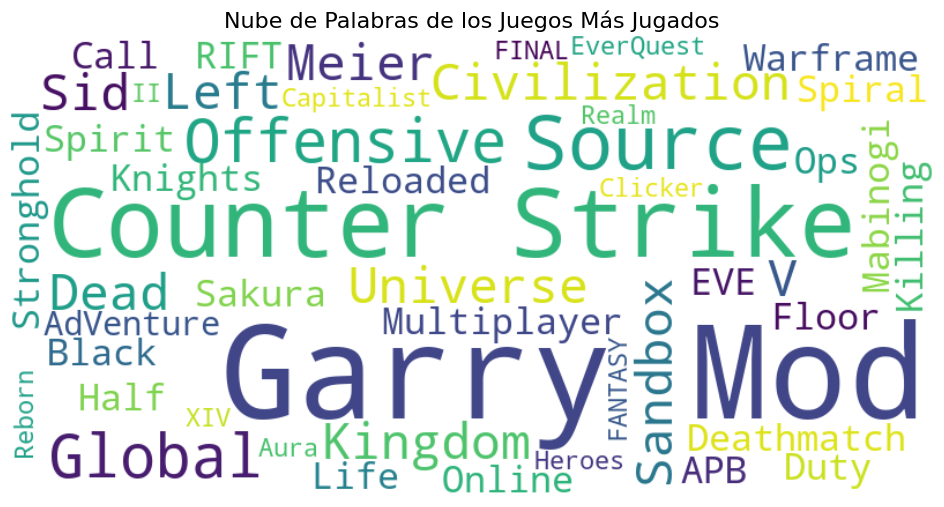

In [60]:
# Filtrar los juegos más jugados
juegos_mas_jugados = df_items.sort_values(by='playtime_forever', ascending=False).head(50)

# Crear una cadena de texto con los nombres de los juegos más jugados
text = ' '.join(juegos_mas_jugados['item_name'].astype(str))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Juegos Más Jugados', fontsize=16)
plt.show()


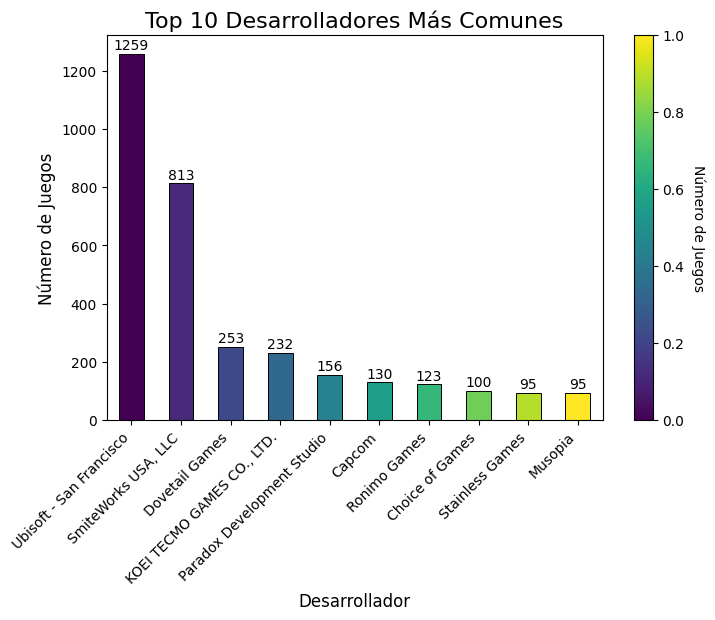

### Generos

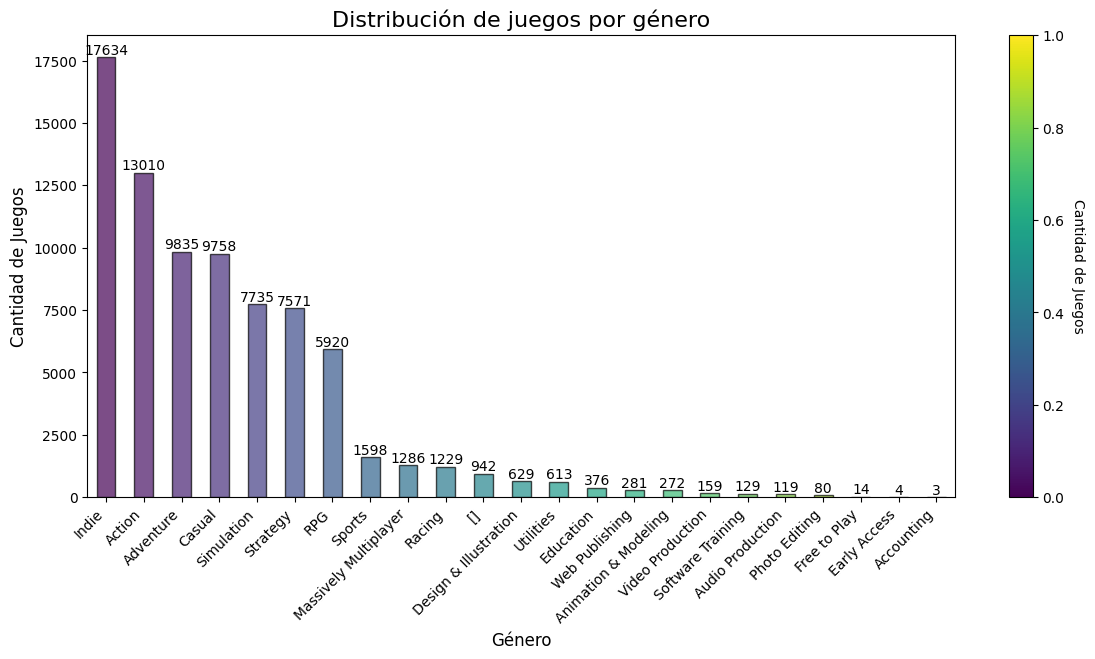

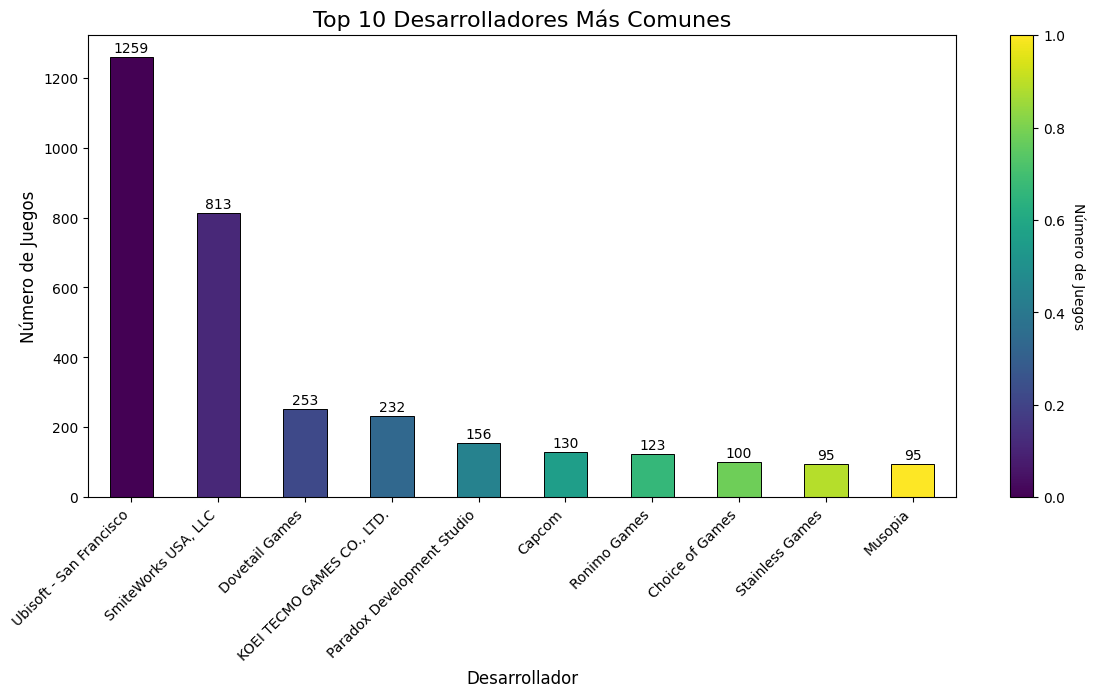

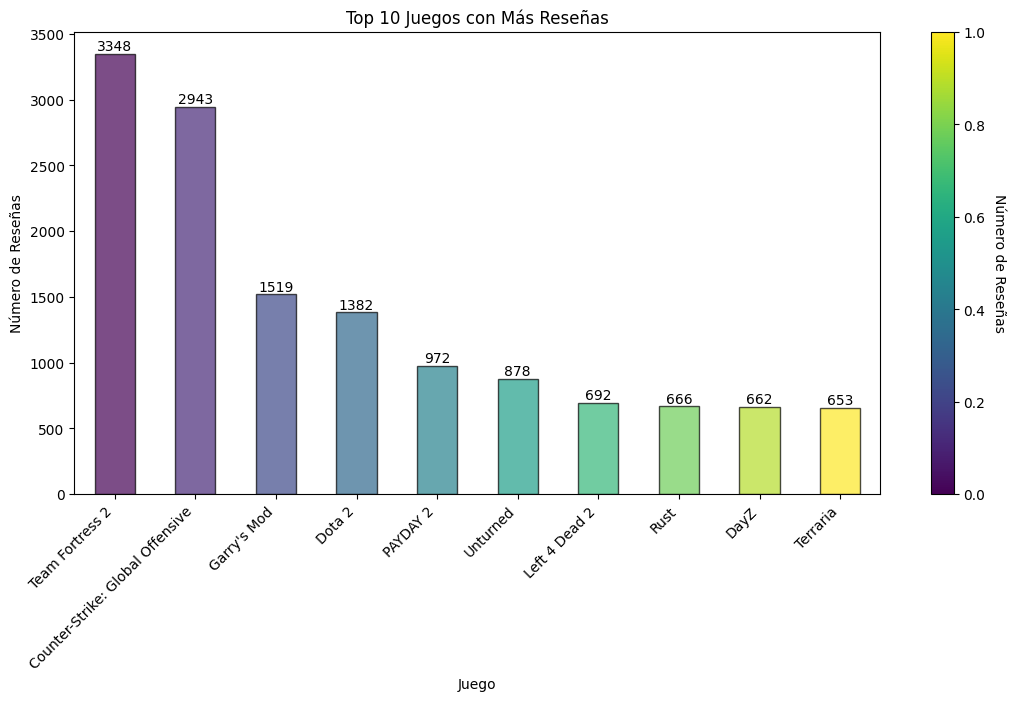

In [64]:
# 22. Análisis de Géneros en df_games
fig, axes = plt.subplots(figsize=(14, 6))

# Gráfico de barras para la distribución de géneros
genres_counts = df_games['genres'].str.split(', ', expand=True).stack().value_counts()
color = plt.cm.viridis(np.linspace(0, 1, len(genres_counts)))  # Colores graduados
genres_counts.plot(kind='bar', ax=axes, color=color, edgecolor='black', alpha=0.7)
axes.set_xlabel('Género', fontsize=12)
axes.set_ylabel('Cantidad de Juegos', fontsize=12)
axes.set_title('Distribución de juegos por género', fontsize=16)

# Agregar etiquetas con la cantidad de juegos en la parte superior de cada barra
for i, v in enumerate(genres_counts):
    axes.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

# Añadir paleta de colores
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Necesario para que funcione el colorbar
cbar = plt.colorbar(sm, ax=axes)
cbar.set_label('Cantidad de Juegos', rotation=270, labelpad=15)

plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()


# Filtrar el DataFrame para excluir el desarrollador 'Dato Faltante'

df_games_filtered = df_games[df_games['developer'] != 'Dato Faltante']
# Gráfico de barras para los 10 desarrolladores más comunes
top_developers = df_games_filtered['developer'].value_counts().head(10)
# Resto del código sigue igual
fig, axes = plt.subplots(figsize=(14,6))
color = plt.cm.viridis(np.linspace(0, 1, len(top_developers)))  # Colores graduados
top_developers.plot(kind='bar', ax=axes, color=color, edgecolor='black', linewidth=0.7)
axes.set_title('Top 10 Desarrolladores Más Comunes', fontsize=16)
axes.set_xlabel('Desarrollador', fontsize=12)
axes.set_ylabel('Número de Juegos', fontsize=12)
# Agregar etiquetas con el número total de juegos en la parte superior de cada barra
for i, v in enumerate(top_developers):
    axes.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)
# Añadir paleta de colores
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Necesario para que funcione el colorbar
cbar = plt.colorbar(sm, ax=axes)
cbar.set_label('Número de Juegos', rotation=270, labelpad=15)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

# Gráfico de Barras de Juegos con Más Reseñas
plt.figure(figsize=(13, 6))

# Unir los DataFrames en base a la columna 'item_id'
df_resenas_juegos = pd.merge(df_reviews, df_games[['item_id', 'app_name']], left_on='reviews_item_id', right_on='item_id', how='left')

# Obtener los top 10 juegos con más reseñas
top_juegos_con_mas_resenas = df_resenas_juegos['app_name'].value_counts().head(10)

# Colores graduados
color = plt.cm.viridis(np.linspace(0, 1, len(top_juegos_con_mas_resenas)))

# Graficar la cantidad de reseñas por juego
top_juegos_con_mas_resenas.plot(kind='bar', edgecolor='black', color=color, alpha=0.7)
plt.xlabel('Juego')
plt.ylabel('Número de Reseñas')
plt.title('Top 10 Juegos con Más Reseñas')

# Agregar etiquetas con el número total de reseñas en la parte superior de cada barra
for i, v in enumerate(top_juegos_con_mas_resenas):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

# Añadir paleta de colores
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Necesario para que funcione el colorbar
cbar = plt.colorbar(sm)
cbar.set_label('Número de Reseñas', rotation=270, labelpad=15)

plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()


## Analisis Multivariado


Explorar posibles relaciones entre las variables en df_games. Podemos utilizar un gráfico de dispersión o un pairplot para esto.

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='tags', y='item_id', data=df_games)
plt.title('Impacto de Etiquetas en Calificaciones')
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='item_id', data=df_games)
plt.title('Distribución de Calificaciones a lo largo del Tiempo')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='item_id', data=df_games)
plt.title('Distribución de Calificaciones a lo largo del Tiempo')
plt.show()


In [ ]:
correlation_matrix = df_games[['items_count', 'release_date']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='release_date', hue='genres', data=df_games)
plt.title('Distribución de Géneros por Año de Lanzamiento')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='developer', hue='tags', data=df_games)
plt.title('Comparación de Desarrolladores por Etiquetas')
plt.xticks(rotation=45)
plt.show()


## Correlacion de variables

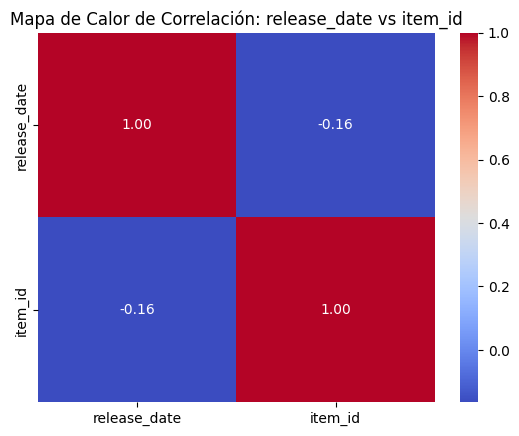

In [2]:
# Mapa de Calor de Correlación
corr_matrix = df_games[['release_date', 'item_id']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación: release_date vs item_id')
plt.show()


### Análisis de Correlación de Variables:

Correlación de Variables:
Calcularemos y visualizaremos la matriz de correlación entre las variables numéricas en df_games

Conclusiones:
Basándonos en los análisis anteriores, podremos extraer conclusiones sobre las características y relaciones presentes en los DataFrames.

Ejemplo: "Existe una correlación positiva moderada entre items_count y playtime_forever en df_items, lo que sugiere que a medida que el número de items aumenta, el tiempo de juego también tiende a aumentar.

In [ ]:
# 6. Análisis de Correlación de Variables
correlation_release_item = df_games[['release_date', 'item_id']].corr().iloc[0, 1]
print(f'Correlación entre release_date y item_id: {correlation_release_item}')


# 2_ **`australian_user_items`**

**Las columnas de este dataset son:**   
  * 🆔 user_id: El identificador único del usuario.
  * 📊 items_count: La cantidad de elementos del usuario.
  * 🆔 steam_id: El identificador de Steam del usuario.
  * 🔗 user_url: El enlace al perfil del usuario.
  * 📦 items: Los elementos del usuario(en forma de lista anidada)


In [5]:
# 1. Tipos de Variables
tipos = df_items.dtypes
print("\nTipos de Variables en df_games:")
print(tipos)



Tipos de Variables en df_games:
user_id              object
items_count           int64
steam_id              int64
item_id               int64
item_name            object
playtime_forever    float64
playtime_2weeks     float64
dtype: object


## Histograma

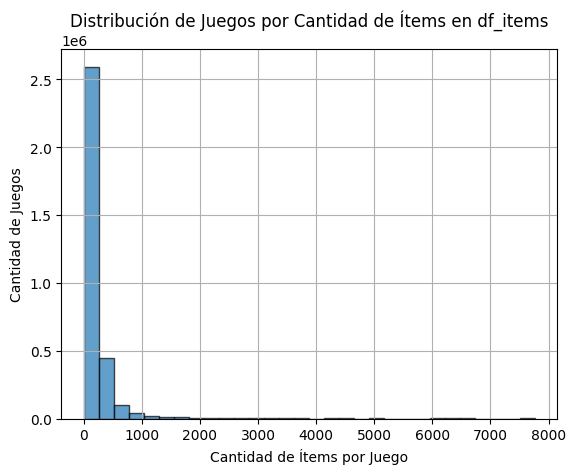

In [8]:
# 19. Distribución de Juegos por Cantidad de Ítems en df_items
df_items['items_count'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Cantidad de Ítems por Juego')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Juegos por Cantidad de Ítems en df_items')
plt.show()


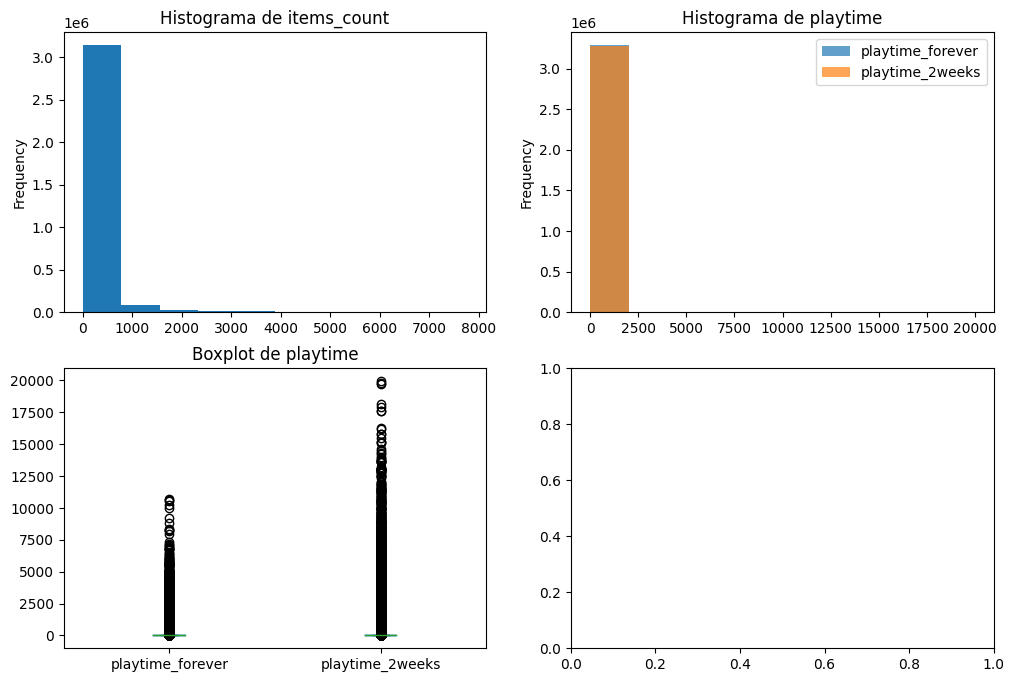

In [36]:
# 5. Histogramas y Boxplot en df_items
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_items['items_count'].plot(kind='hist', ax=axes[0, 0], title='Histograma de items_count')
df_items[['playtime_forever', 'playtime_2weeks']].plot(kind='hist', ax=axes[0, 1], alpha=0.7, title='Histograma de playtime')
df_items[['playtime_forever', 'playtime_2weeks']].plot(kind='box', ax=axes[1, 0], title='Boxplot de playtime')
plt.show()

## Histogramas

Histogramas:

Crearemos histogramas para visualizar la distribución de las variables items_count, playtime_forever, y playtime_2weeks en df_items.
Boxplots:

Generaremos boxplots para analizar la distribución de las variables mencionadas en df_items.

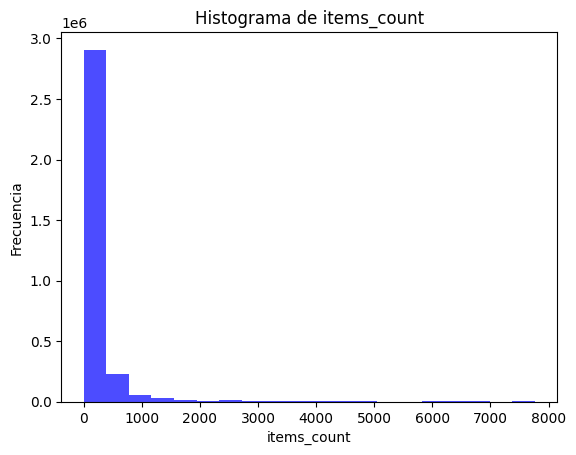

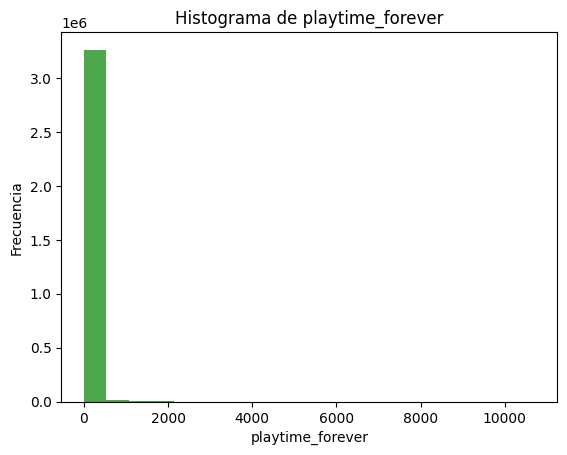

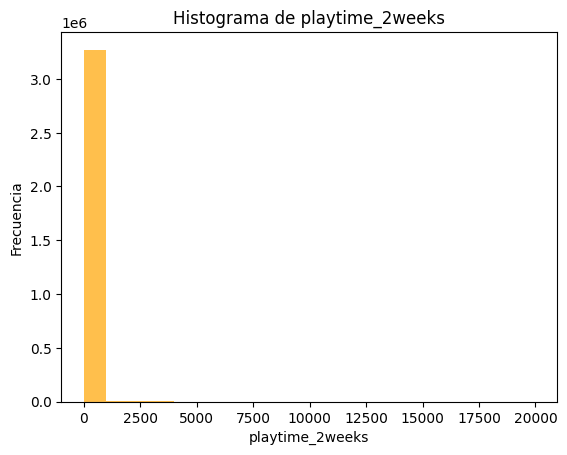

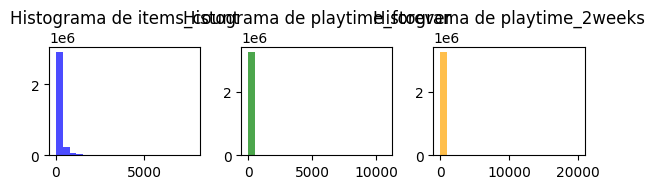

In [37]:

# Histograma para items_count
plt.hist(df_items['items_count'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de items_count')
plt.xlabel('items_count')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para playtime_forever
plt.hist(df_items['playtime_forever'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de playtime_forever')
plt.xlabel('playtime_forever')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para playtime_2weeks
plt.hist(df_items['playtime_2weeks'], bins=20, color='orange', alpha=0.7)
plt.title('Histograma de playtime_2weeks')
plt.xlabel('playtime_2weeks')
plt.ylabel('Frecuencia')
plt.show()

# 6. Histogramas
plt.figure(figsize=(6, 2))

# Histograma para items_count
plt.subplot(1, 3, 1)
plt.hist(df_items['items_count'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de items_count')

# Histograma para playtime_forever
plt.subplot(1, 3, 2)
plt.hist(df_items['playtime_forever'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de playtime_forever')

# Histograma para playtime_2weeks
plt.subplot(1, 3, 3)
plt.hist(df_items['playtime_2weeks'], bins=20, color='orange', alpha=0.7)
plt.title('Histograma de playtime_2weeks')

plt.tight_layout()
plt.show()




## Boxplot

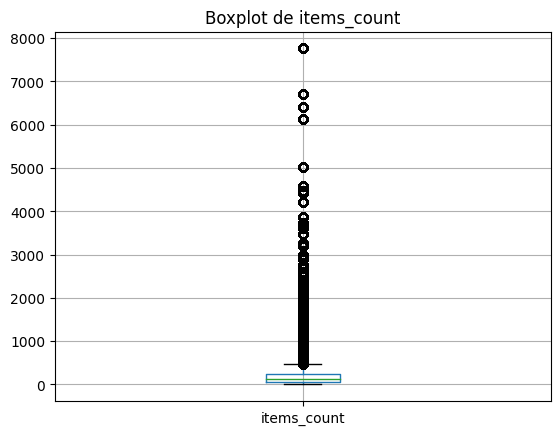

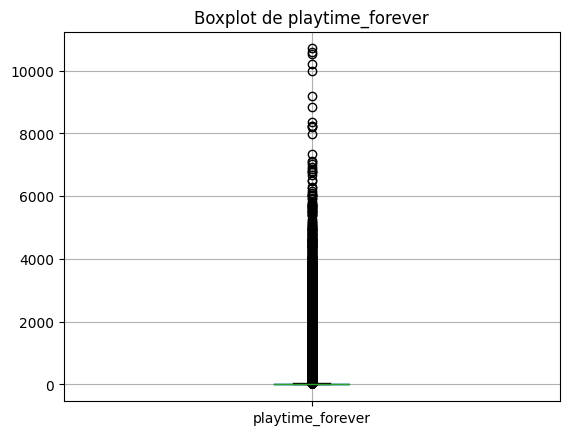

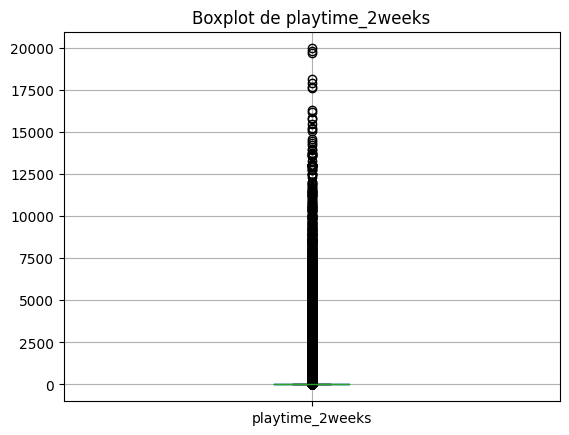

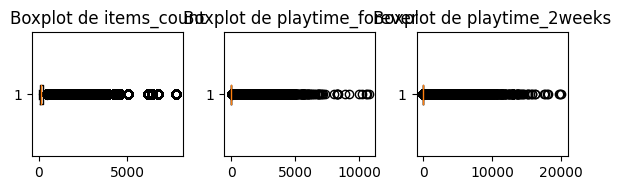

In [38]:
# 5. Boxplot
# Boxplot para items_count
df_items.boxplot(column='items_count')
plt.title('Boxplot de items_count')
plt.show()

# Boxplot para playtime_forever
df_items.boxplot(column='playtime_forever')
plt.title('Boxplot de playtime_forever')
plt.show()

# Boxplot para playtime_2weeks
df_items.boxplot(column='playtime_2weeks')
plt.title('Boxplot de playtime_2weeks')
plt.show()

# 7. Boxplots
plt.figure(figsize=(6, 2))

# Boxplot para items_count
plt.subplot(1, 3, 1)
plt.boxplot(df_items['items_count'], vert=False)
plt.title('Boxplot de items_count')

# Boxplot para playtime_forever
plt.subplot(1, 3, 2)
plt.boxplot(df_items['playtime_forever'], vert=False)
plt.title('Boxplot de playtime_forever')

# Boxplot para playtime_2weeks
plt.subplot(1, 3, 3)
plt.boxplot(df_items['playtime_2weeks'], vert=False)
plt.title('Boxplot de playtime_2weeks')

plt.tight_layout()
plt.show()



In [39]:
# 3. Medidas de Variabilidad
variabilidad_df_items = df_items.var()
print("\nMedidas de Variabilidad en df_items:")
print(variabilidad_df_items)


TypeError: could not convert string to float: 'Counter-Strike'

## Analisis multivariado y de correlacion

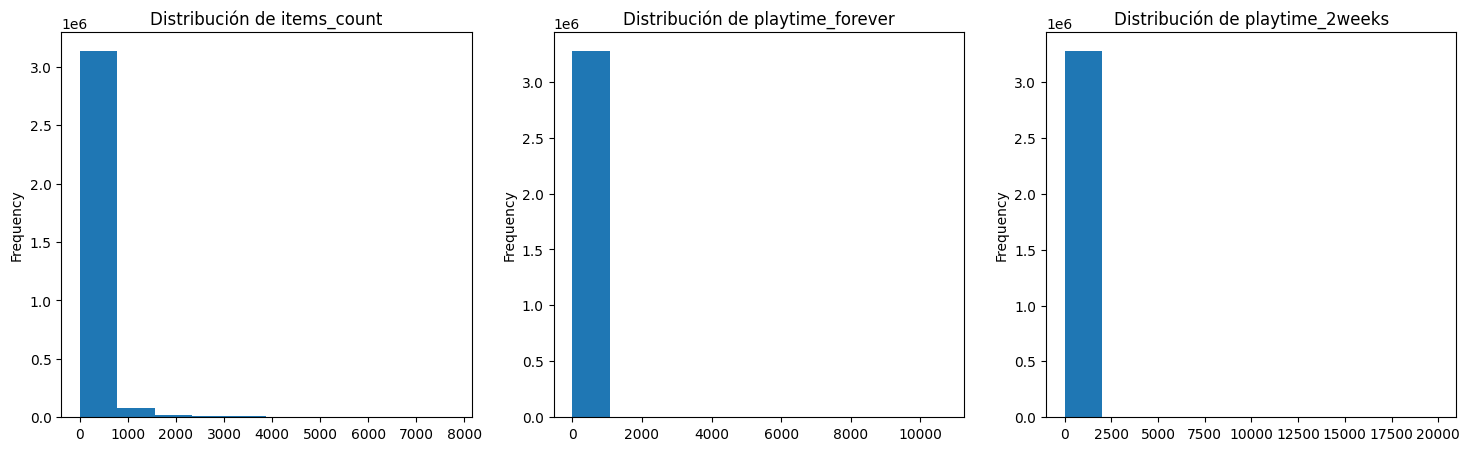

In [40]:
# 10. Análisis de Variables Numéricas en df_items
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
df_items['items_count'].plot(kind='hist', ax=axes[0], title='Distribución de items_count')
df_items['playtime_forever'].plot(kind='hist', ax=axes[1], title='Distribución de playtime_forever')
df_items['playtime_2weeks'].plot(kind='hist', ax=axes[2], title='Distribución de playtime_2weeks')
plt.show()


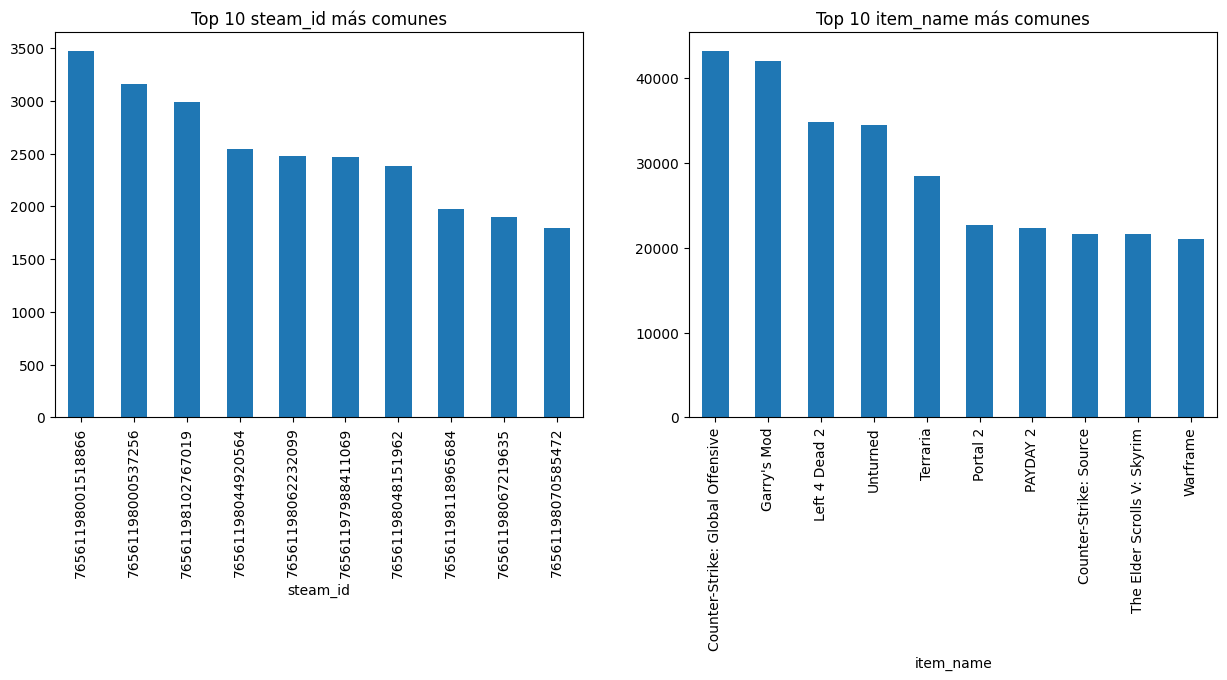

In [41]:
# 11. Análisis de Variables Categóricas en df_items
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_items['steam_id'].value_counts().head(10).plot(kind='bar', ax=axes[0], title='Top 10 steam_id más comunes')
df_items['item_name'].value_counts().head(10).plot(kind='bar', ax=axes[1], title='Top 10 item_name más comunes')
plt.show()


C:\Users\El Bauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


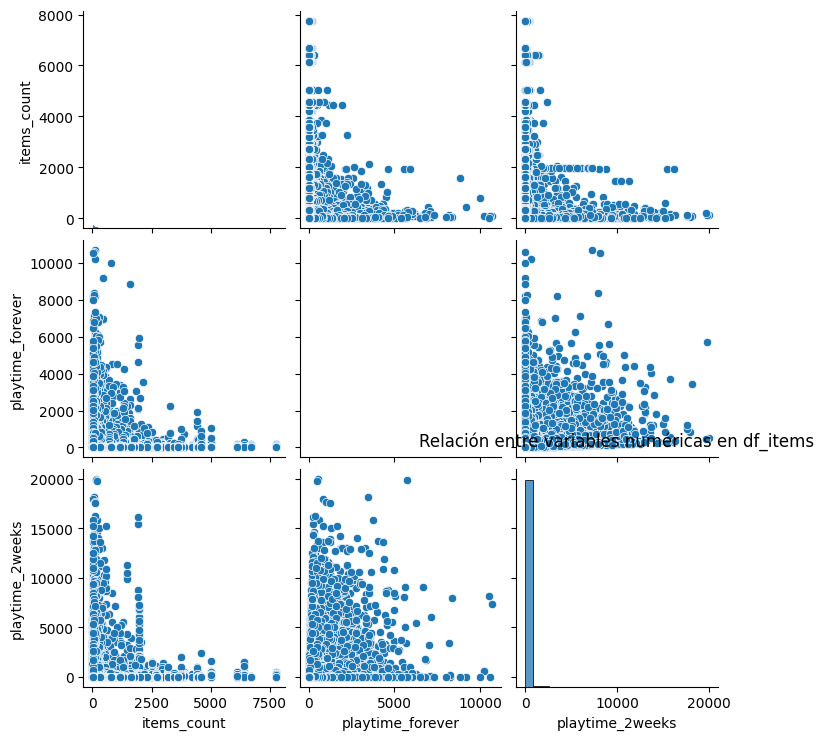

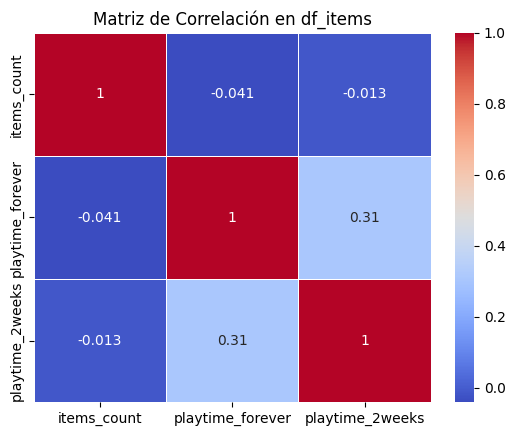

In [42]:
# 6. Análisis Multivariado y de Correlación en df_items
sns.pairplot(df_items[['items_count', 'playtime_forever', 'playtime_2weeks']])
plt.title('Relación entre variables numéricas en df_items')
plt.show()

correlation_matrix_items = df_items[['items_count', 'playtime_forever', 'playtime_2weeks']].corr()
sns.heatmap(correlation_matrix_items, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación en df_items')
plt.show()


C:\Users\El Bauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


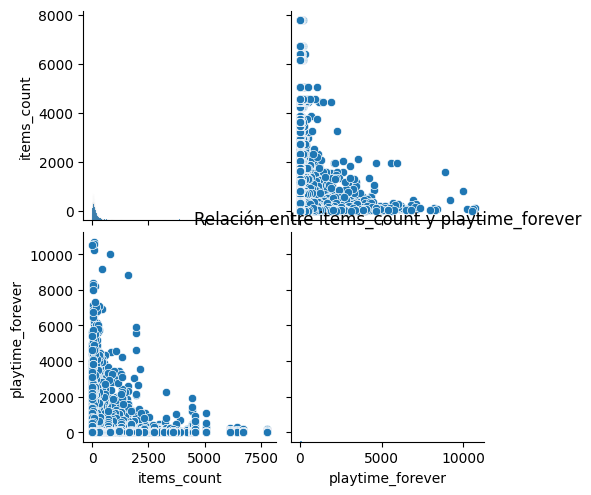

In [43]:
# 5. Análisis Multivariado
sns.pairplot(df_items[['items_count', 'playtime_forever']])
plt.title('Relación entre items_count y playtime_forever')
plt.show()


## Matriz de correlacion

Análisis de Correlación de Variables:
Calcularemos la matriz de correlación para entender cómo se relacionan entre sí las variables numéricas en df_items.

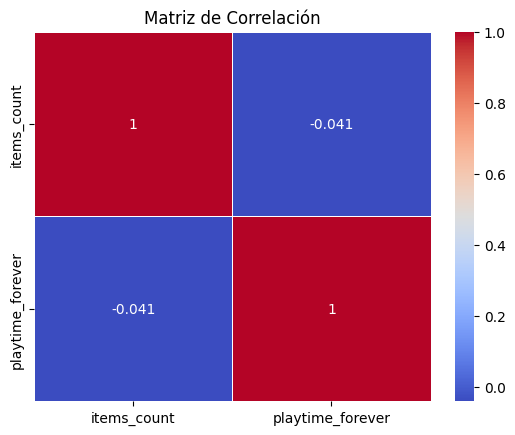

In [44]:
# 6. Análisis de Correlación de Variables
correlation_matrix = df_items[['items_count', 'playtime_forever']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


In [45]:
# 12. Matriz de Correlación en df_items
correlation_matrix_items = df_items.corr()
sns.heatmap(correlation_matrix_items, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación en df_items')
plt.show()


ValueError: could not convert string to float: 'js41637'

# 3_ **`australian_user_reviews`**

**Las columnas de este dataset son:**    
  * 🆔 **user_id**: El identificador único del usuario.
  * 🔗 **user_url**: El enlace al perfil del usuario.
  * 📰 **reviews**: El enlace a las reseñas del usuario.


In [46]:
# 1. Tipos de Variables
tipos_variables_df_reviews = df_reviews.dtypes
print("Tipos de Variables en df_reviews:")
print(tipos_variables_df_reviews)

# 2. Descripción Estadística
descripcion_estadistica_reviews = df_reviews.describe()
print("\nDescripción Estadística de df_reviews:")
print(descripcion_estadistica_reviews)


Tipos de Variables en df_reviews:
user_id              object
user_url             object
reviews_posted        int64
reviews_item_id       int64
reviews_helpful      object
reviews_recommend      bool
reviews_review       object
dtype: object

Descripción Estadística de df_reviews:
       reviews_posted  reviews_item_id
count    47626.000000     47626.000000
mean      2014.149351    155200.893294
std          0.841130    124600.139971
min       2010.000000        10.000000
25%       2014.000000      6060.000000
50%       2014.000000    209080.000000
75%       2015.000000    247940.000000
max       2015.000000    428880.000000


**Medidas de Variabilidad:**

Calcularemos medidas de variabilidad para la variable numérica reviews_posted, como la varianza y la desviación estándar.

In [47]:
# 3. Medidas de Variabilidad
variance_reviews_posted = df_reviews['reviews_posted'].var()
std_dev_reviews_posted = df_reviews['reviews_posted'].std()

# Mostrar los resultados
print(f'Varianza de reviews_posted: {variance_reviews_posted}')
print(f'Desviación Estándar de reviews_posted: {std_dev_reviews_posted}')


Varianza de reviews_posted: 0.7074995265494385
Desviación Estándar de reviews_posted: 0.8411299106258429


## Histogramas

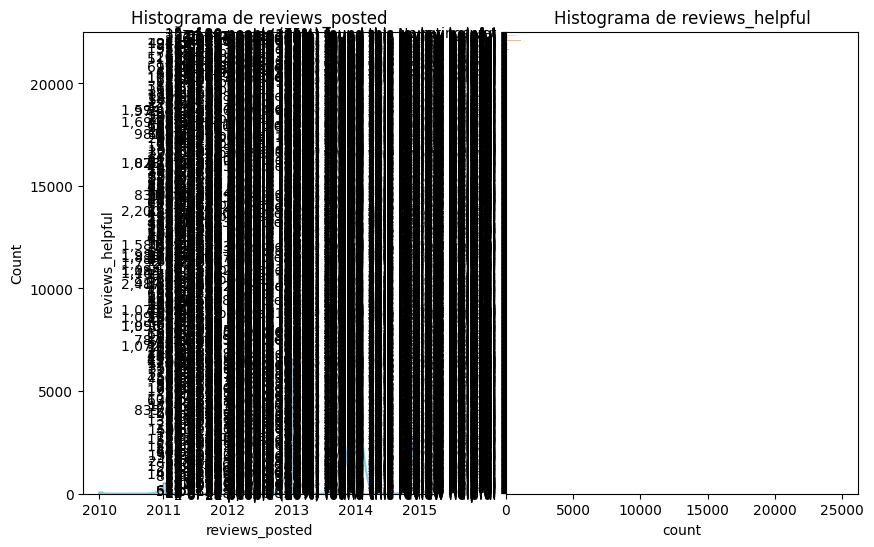

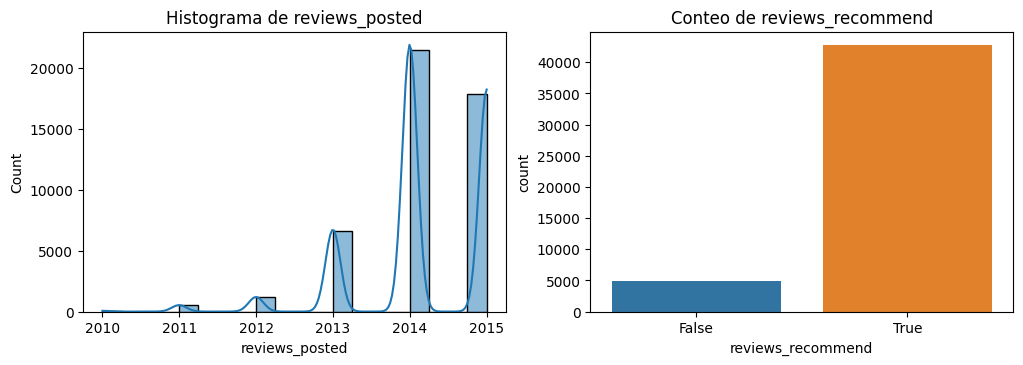

In [48]:
# 4. Histogramas
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_reviews['reviews_posted'], kde=True, color='skyblue')
plt.title('Histograma de reviews_posted')

plt.subplot(1, 2, 2)
sns.countplot(y='reviews_helpful', data=df_reviews, palette='pastel')
plt.title('Histograma de reviews_helpful')

plt.show()

# 4. Histogramas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_reviews['reviews_posted'], bins=20, kde=True)
plt.title('Histograma de reviews_posted')

plt.subplot(2, 2, 2)
sns.countplot(x='reviews_recommend', data=df_reviews)
plt.title('Conteo de reviews_recommend')

plt.show()



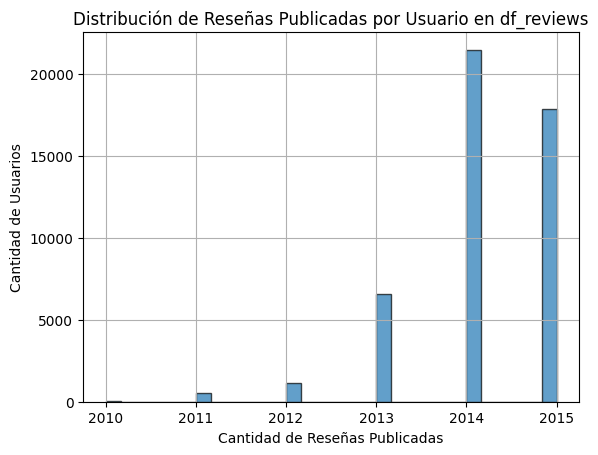

In [49]:
# 18. Histograma de Reseñas Publicadas por Usuario en df_reviews
df_reviews['reviews_posted'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Cantidad de Reseñas Publicadas')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Reseñas Publicadas por Usuario en df_reviews')
plt.show()


## Medidas de variabilidad

In [50]:
# 3. Medidas de Variabilidad
var_reviews_posted = df_reviews['reviews_posted'].var()
print(f'Varianza de reviews_posted: {var_reviews_posted}')


Varianza de reviews_posted: 0.7074995265494385


In [51]:
# 4. Medidas de Variabilidad
variabilidad_df_reviews = df_reviews[['reviews_posted']].std()
print("\nMedidas de Variabilidad en df_reviews (reviews_posted):")
print(variabilidad_df_reviews)



Medidas de Variabilidad en df_reviews (reviews_posted):
reviews_posted    0.84113
dtype: float64


## Boxplot

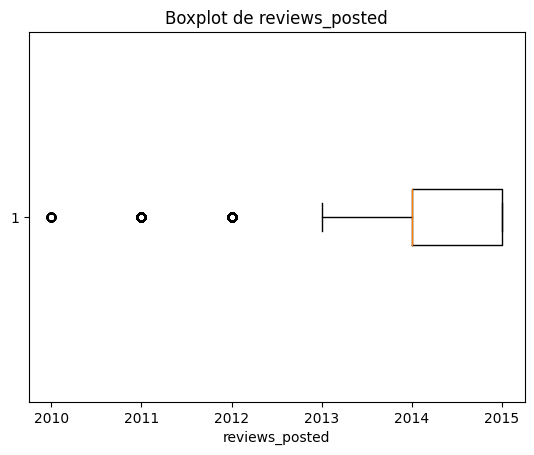

In [52]:

# 5. Boxplot
# Boxplot para reviews_posted
plt.boxplot(df_reviews['reviews_posted'], vert=False)
plt.title('Boxplot de reviews_posted')
plt.xlabel('reviews_posted')
plt.show()


## Análisis Multivariado y de Correlación:

Siguiendo un enfoque similar al utilizado en df_items, realizaremos un análisis multivariado y de correlación en df_reviews.

C:\Users\El Bauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


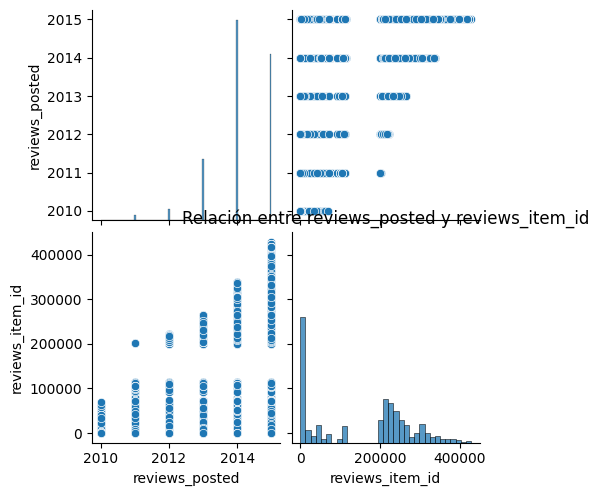

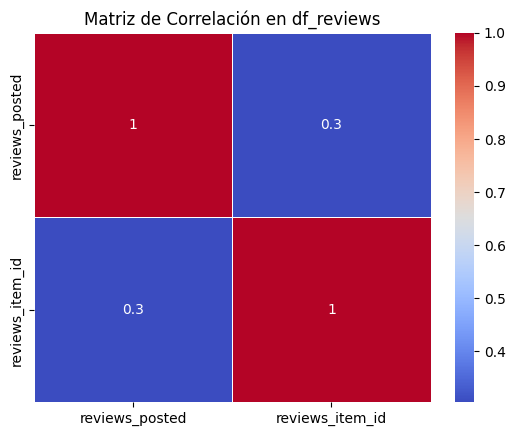

In [53]:
# 8. Análisis Multivariado y de Correlación en df_reviews
sns.pairplot(df_reviews[['reviews_posted', 'reviews_item_id']])
plt.title('Relación entre reviews_posted y reviews_item_id')
plt.show()

correlation_matrix_reviews = df_reviews[['reviews_posted', 'reviews_item_id']].corr()
sns.heatmap(correlation_matrix_reviews, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación en df_reviews')
plt.show()


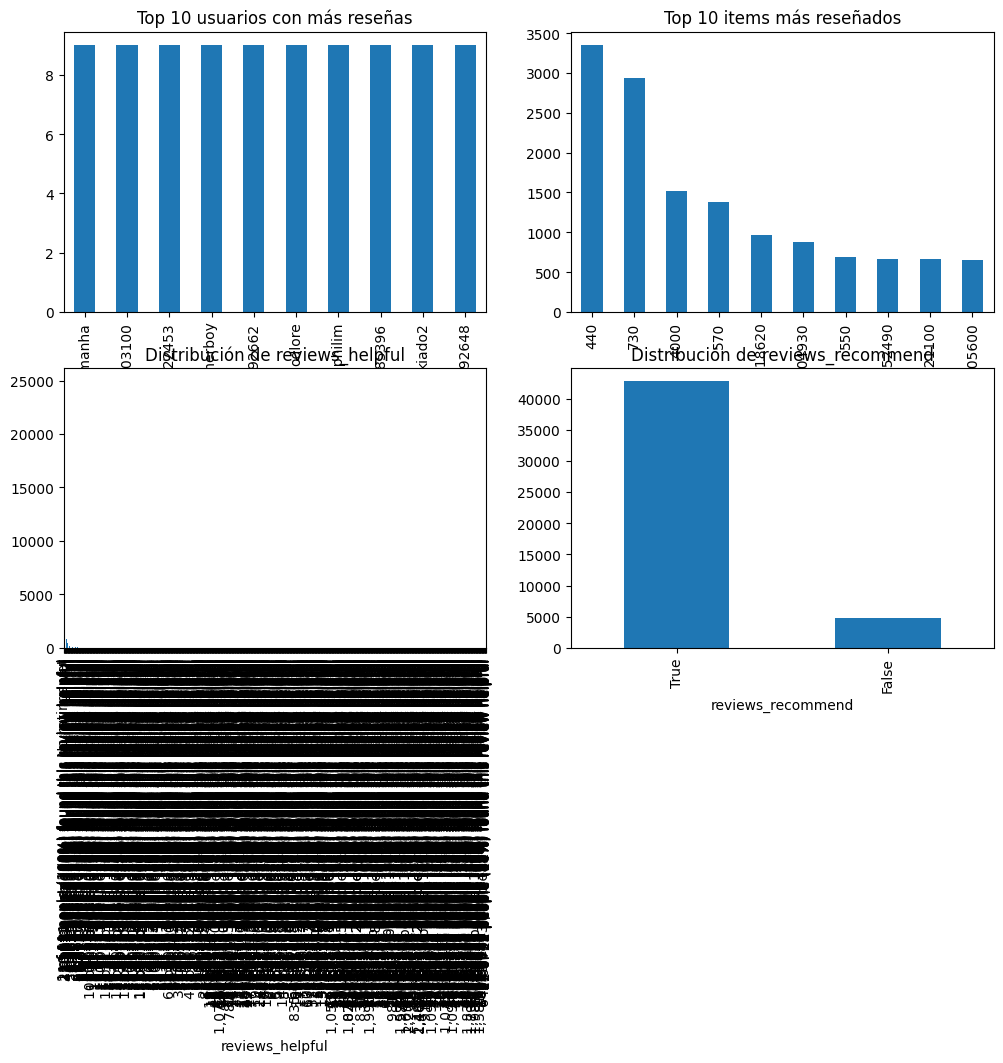

In [54]:
# 8. Análisis de las Variables Categóricas en df_reviews
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_reviews['user_id'].value_counts().head(10).plot(kind='bar', ax=axes[0, 0], title='Top 10 usuarios con más reseñas')
df_reviews['reviews_item_id'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1], title='Top 10 items más reseñados')
df_reviews['reviews_helpful'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Distribución de reviews_helpful')
df_reviews['reviews_recommend'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Distribución de reviews_recommend')
plt.show()


Análisis de Variables Textuales:
Para la variable reviews_review, que contiene las reseñas de los usuarios, podemos realizar un análisis de texto para obtener información sobre las opiniones.

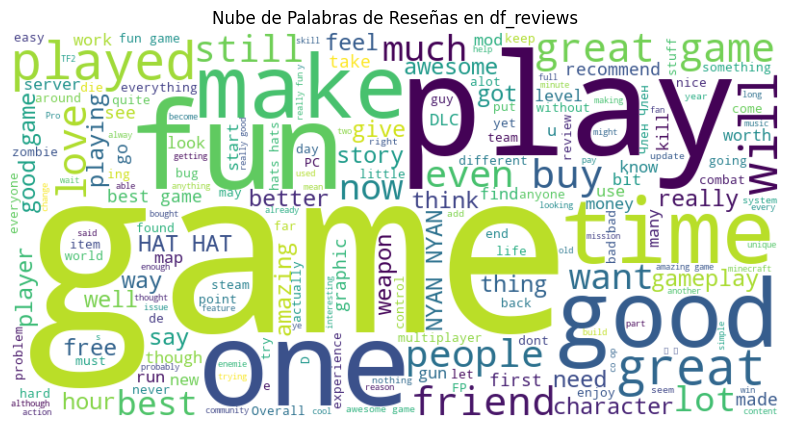

In [55]:
# 16. Análisis de Variables Textuales en df_reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_reviews = ' '.join(df_reviews['reviews_review'].dropna())
reviews_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(reviews_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas en df_reviews')
plt.show()


Distribución de Reseñas Recomendadas:
Visualizaremos la distribución de reseñas recomendadas.

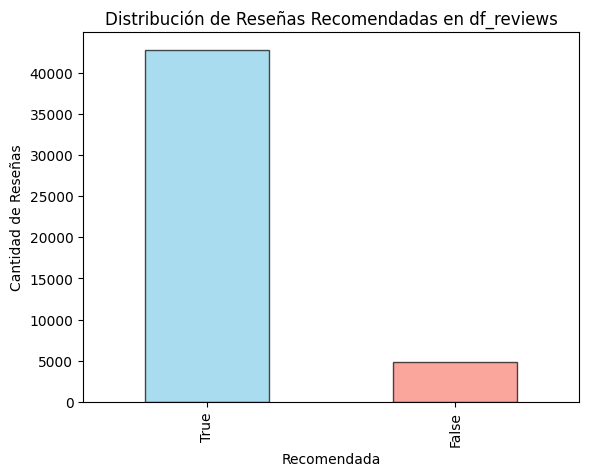

In [56]:
# 17. Distribución de Reseñas Recomendadas en df_reviews
df_reviews['reviews_recommend'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='k', alpha=0.7)
plt.xlabel('Recomendada')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de Reseñas Recomendadas en df_reviews')
plt.show()


# Conclusiones Finales:
A partir de todos los análisis realizados en los DataFrames df_items, df_games y df_reviews, generaremos conclusiones finales que resuman los patrones y relaciones identificadas.

Ejemplo: "En general, observamos una correlación débil entre el número de revisiones publicadas (reviews_posted) y la identificación del item de revisión (reviews_item_id) en el DataFrame df_reviews."

* Informe EDA en Notebook:

* El informe presenta un análisis profundo de todos los elementos clave y los criterios de decisión se encuentran explícitos. La selección de gráficas es pertinente y se apoya en las mismas para dicho análisis. Incluye lo básico esperado en un EDA:

* - chequeo de nulos
* - valores duplicados
* - valores faltantes
* - tipos de datos
* - análisis estadístico de datos
* - análisis de correlaciones bi y multivariado

* TIPOS DE VARIABLES
* DESCRIPCION ESTADISTICA 
* MEDIDAS DE VARIABILIDAD
* HISTORGRAMAS
* BOXPLOT
* ANALISIS MULTIVARIADO
* ANALISIS DE CORRELACION DE VARIABLES
* CONCLUSIONES

#### Creamos una funcion para revisar:
    - Tipos de datos
    - Chequeo de nulos

In [57]:
# Funcion
def data_type_check(df):
    # Crear un diccionario para almacenar el resumen de datos


    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)

    return df_info

In [58]:
#Invoco mi funcion
data_type_check(df_juegos)

NameError: name 'df_juegos' is not defined

In [ ]:
def check_duplicates(df):
    # Verificar si hay duplicados en el DataFrame
    duplicates = df.duplicated().sum()
    
    if duplicates > 0:
        print(f"Hay {duplicates} valores duplicados en el DataFrame.")
    else:
        print("No se encontraron valores duplicados en el DataFrame.")

In [ ]:
check_duplicates(df_juegos)

NameError: name 'check_duplicates' is not defined

1.3 Borramos todas las columnas que no vamos a usar 

In [ ]:
#Borramos title 
df_juegos.drop(['publisher', 'url', 'tags', 'specs', 'price', 'early_access', 'id','developer'], axis=1, inplace=True)

#### Identifico filas que presentan registros completamente vacíos y procedo a eliminarlas del conjunto de datos.

In [ ]:
df_juegos = df_juegos.dropna(how='all').reset_index(drop=True)

#Eliminamos campos totalmente duplicados en ID
df_juegos.drop_duplicates(subset='id', inplace=True)